In [3]:
import json
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from collections import defaultdict

In [4]:
# Obtain Dice results
with open('/home/t722s/Desktop/Sam-Med3DTest/NetworkHeartModified/original.json', 'r') as f:
    original = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/NetworkHeartModified/interactive.json', 'r') as f:
    interactive = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/NetworkHeartModified/presupplied.json', 'r') as f:
    presupplied = json.load(f)


dice_arrays = {
    'original':     np.array([v['dice'] for v in original.values()]).T,
    'interactive':  np.array([v['dice'] for v in interactive.values()]).T,
    'presupplied':  np.array([v['dice'] for v in presupplied.values()]).T,
}


FileNotFoundError: [Errno 2] No such file or directory: '/home/t722s/Desktop/Sam-Med3DTest/NetworkHeartModified/original.json'

In [95]:

with open('/home/t722s/Desktop/Sam-Med3DTest/NetworkHeartModified/interactive.json', 'r') as f:
    interactive = json.load(f)

res_dict = {'interactive': interactive}

In [96]:
n_click = 4

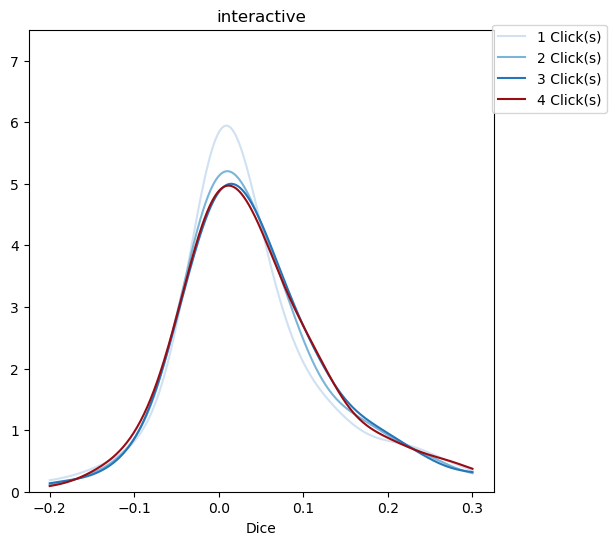

In [97]:
# Value added by clicks 1 through n relative to n 
organ = 'left atrium'
diffs_dict = dict()
for protocol, res in res_dict.items():
    diff_to_first = defaultdict(list)
    for seed_res in interactive.values():
        for file_res in seed_res.values():
            for i in range(1,5):
                diff_to_first[i].append(file_res[organ][str(i)] - file_res[organ]['0'])
    diffs_dict[protocol] = diff_to_first

# Common plotting elements
n_click = 4
x_range = np.linspace(-0.2, 0.3, 500)
color_start = 0.2  # Start from a darker shade
color_end = 1  # End before the darkest shade to keep a uniform intensity
colors = [cm.Blues(i / (n_click-1) * (color_end - color_start) + color_start) for i in range(n_click-1)]
colors.append(cm.Reds(0.9))

fig, ax = plt.subplots(len(diffs_dict),1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5, right=0.9)

for i, (protocol, res) in enumerate(diffs_dict.items()):
    for click, diffs in res.items():
        kde = gaussian_kde(diffs)
        kde_values = kde(x_range)
        
        # Plot each row's KDE with a different color
        ax.plot(x_range, kde_values, color=colors[click-1], label=f'{click} Click(s)')
        # ax[i].plot(x_range, kde_values, color=colors[click-1], label=f'{click} Click(s)')

    ax.set_title(protocol)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim([0,7.5])

    # ax.set_title(protocol)
    # ax.set_xlabel(None)
    # ax.set_ylabel(None)
    # ax.set_ylim([0,7.5])

    if i == 0: 
        fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax.set_xlabel('Dice')
plt.show()


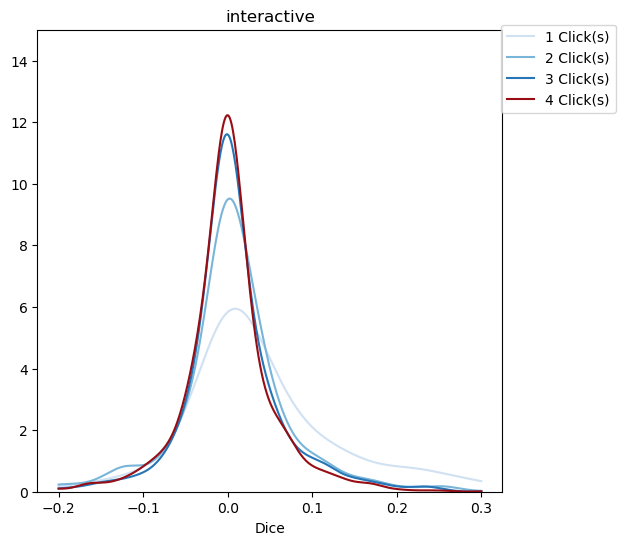

In [98]:
# Value added by nth click relative to n-1th click dice
diffs_prev_dict = dict()
for protocol, res in res_dict.items():
    diff_to_prev = defaultdict(list)
    for seed_res in res.values():
        for file_res in seed_res.values():
            for i in range(1,5):
                diff_to_prev[i].append(file_res[organ][str(i)] - file_res[organ][str(i-1)])
    diffs_prev_dict[protocol] = diff_to_prev

# Common plotting elements
n_click = 4
x_range = np.linspace(-0.2, 0.3, 500)
color_start = 0.2  # Start from a darker shade
color_end = 1  # End before the darkest shade to keep a uniform intensity
colors = [cm.Blues(i / (n_click-1) * (color_end - color_start) + color_start) for i in range(n_click-1)]
colors.append(cm.Reds(0.9))

fig, ax = plt.subplots(len(diffs_dict),1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5, right=0.9)

for i, (protocol, res) in enumerate(diffs_prev_dict.items()):
    for click, diffs in res.items():
        kde = gaussian_kde(diffs)
        kde_values = kde(x_range)
        
        # Plot each row's KDE with a different color
        ax.plot(x_range, kde_values, color=colors[click-1], label=f'{click} Click(s)')
        # ax[i].plot(x_range, kde_values, color=colors[click-1], label=f'{click} Click(s)')

    ax.set_title(protocol)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim([0,7.5])

    # ax[i].set_title(protocol)
    # ax[i].set_xlabel(None)
    # ax[i].set_ylabel(None)
    # ax[i].set_ylim([0,7.5])

    if i == 0: 
        fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax.set_xlabel('Dice')
plt.show()


0
1
2
3
4


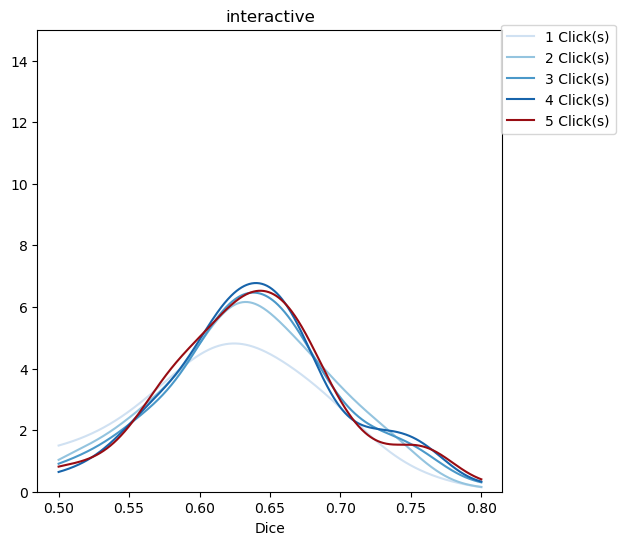

In [119]:
dice = dict()
for protocol, res in res_dict.items():
    vals = defaultdict(list)
    for seed_res in res.values():
        for file_res in seed_res.values():
            for i in range(5):
                vals[i].append(file_res[organ][str(i)])
    dice[protocol] = vals

# Common plotting elements
n_click = 5
x_range = np.linspace(0.5, 0.8, 500)
color_start = 0.2  # Start from a darker shade
color_end = 1  # End before the darkest shade to keep a uniform intensity
colors = [cm.Blues(i / (n_click-1) * (color_end - color_start) + color_start) for i in range(n_click-1)]
colors.append(cm.Reds(0.9))

fig, ax = plt.subplots(len(diffs_dict),1, figsize = (6,6))
plt.subplots_adjust(hspace=0.5, right=0.9)

for i, (protocol, res) in enumerate(dice.items()):
    for click, diffs in res.items():
        kde = gaussian_kde(diffs)
        kde_values = kde(x_range)
        
        # Plot each row's KDE with a different color
        ax.plot(x_range, kde_values, color=colors[click], label=f'{click+1} Click(s)')
                # ax[i].plot(x_range, kde_values, color=colors[click-1], label=f'{click} Click(s)')

    ax.set_title(protocol)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim([0,7.5])

    # ax[i].set_title(protocol)
    # ax[i].set_xlabel(None)
    # ax[i].set_ylabel(None)
    # ax[i].set_ylim([0,7.5])

    ax.set_title(protocol)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim([0,15])

    if i == 0: 
        fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax.set_xlabel('Dice')
plt.show()


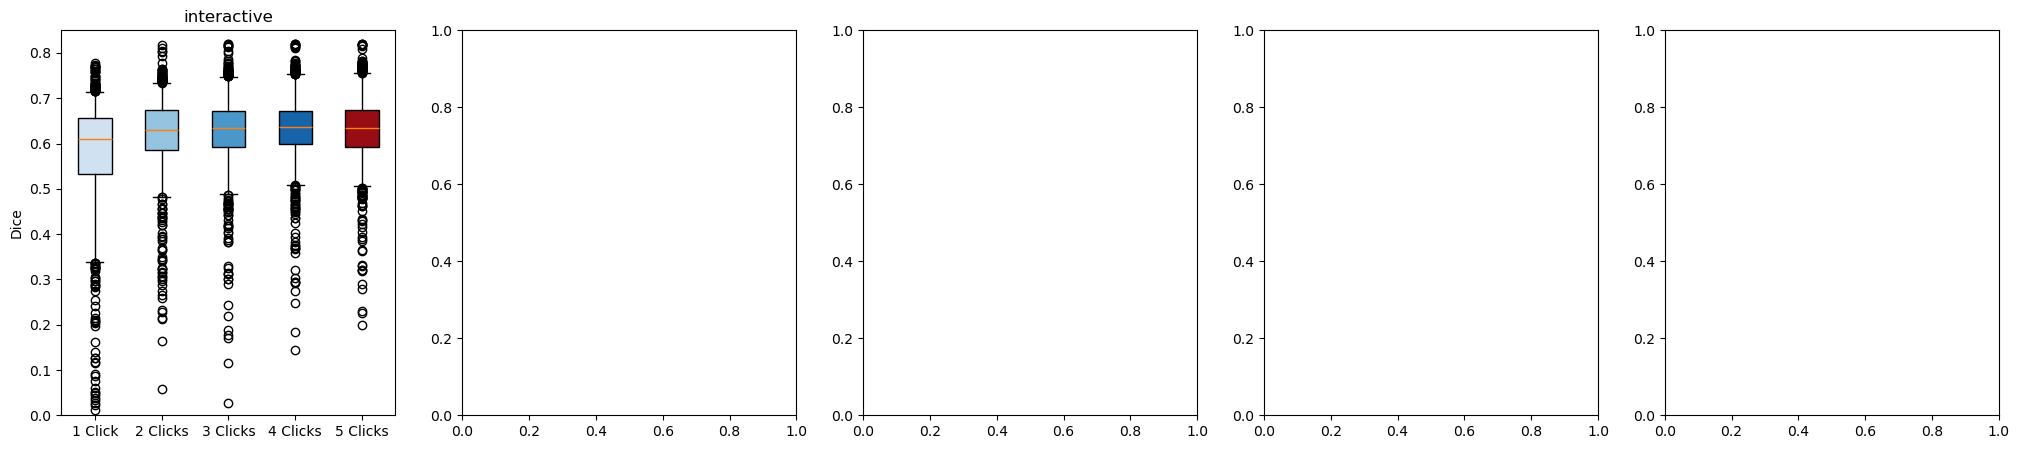

In [126]:
fig, ax = plt.subplots(1,5, figsize = (25,5))
for i, (protocol, data) in enumerate(dice.items()):
    data = np.array([data[0], data[1], data[2], data[3], data[4]]).T
    box = ax[i].boxplot(data, whis=[5,95], patch_artist=True)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Set the x-axis labels
    ax[i].set_xticklabels(['1 Click', '2 Clicks', '3 Clicks', '4 Clicks', '5 Clicks'])

    # Adding title and labels
    ax[i].set_title(protocol)
    ax[i].set_ylim([0,0.85])
    ax[i].set_ylabel(None)
    if i == 0:
        ax[i].set_ylabel('Dice')

# Show the plot
plt.show()
